# Airbnb in New York City - an explorative data analysis

On todays session we want to analyze the Airbnb offer in New York City using and improving our already learned knowledge about data science!

<img src="./_img/NYC_2.jpg"> 

For this tutorial the following commands will be very helpful:

| commands | meaning |
| :-: | :-: |
| `pd.read_csv(<path>)` | Reading a .csv-File from your file System | 
| `len()` | return the length of an input object, for example the row count of an pandas dataframe | 
| `df.columns()` | returns the column names of a dataframe |
| `df.head(<n>)` | returns the first n rows of a dataframe | 
| `df.tail(<n>)` | returns the last n rows of a dataframe | 
| `df.loc[<index>]` | locator to filter a dataframe | 
| `df["<column_name>"]` | filter a dataframe to a given column / return only the specified column of a dataframe | 
| `df.sample(<n>)` | picks randomly n rows out of a dataframe | 
| `df.shape()` | returns the dimensions of a dataframe | 
| `df.unique()` | returns the unique values for each column of a dataframe |  
| `df.groupby("<column_name>")` | groups the information of a dataframe by the specified column | 
| `df.groupby("<column_name>").size()` | return the number of observation in each group | 
| `df.groupby("<column_name>").sort_values()` | sort the output by values, may based on a specified column | 
| `df.groupby("<column_name>").xs("<column_name>")` | extract a specific value set out of a grouped information which consists out of a multi level index | 
| `series.mean()` | calculates the mean value based on the given information list | 
| `df.describe()` | returns a statistical description for all columns of a given dataframe | 

## Loading packages and dataset

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airbnb_NY = pd.read_csv("../data/Airbnb_NYC.csv")

## Get to know the dataset

> **Question 1A)** How many observations yields the dataset?

> **Question 1B)** What columns are included in the dataset?

Okay, now let's get a quick overview:

> **Question 2A)** show the first 10 observations of the dataset!

> **Question 2B)** show the last 15 observations of the dataset!

> **Question 2C)** choose randomly 15 observations out of the dataset and show them!

> **Question 2D)** like C) but only the borough, property type and the price should be shown

## The spatial context matters

Let's take a deeper look on the dataset

> **Question 3A)** Which boroughs of NYC are covered by the dataset?

> **Question 3B)** Which different kind of accomodations exists?

> **Question 3C)** How many airbnb offers exists per borough?

In [25]:
airbnb_NY

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0
...,...,...,...,...,...,...,...,...,...,...
38728,Staten Island,40.64641,-74.08502,EntireHome,2.0,1.0,106,58,4.73,130.0
38729,Staten Island,40.64682,-74.08734,PrivateRoom,20.0,1.0,89,58,1.05,43.0
38730,Staten Island,40.64730,-74.08408,PrivateRoom,30.0,4.0,0,85,1.35,105.0
38731,Staten Island,40.64762,-74.08682,EntireHome,3.0,1.0,232,5,1.88,135.0


In [23]:
#airbnb_NY.groupby?

> **Question 3D)** Order the output from C) by the count of offers!

In [24]:
#airbnb_NY.sort_values?

> **Question 3E)** Refine your search: how is the type of property influenced by the boroughs? Provide a table view!

> **Question 3F)** Provide a plot to visualize E) 
hint: try at first to provide a barplot only for Bronx and afterwars for all boroughs at the same time)

<AxesSubplot:xlabel='Boroughs'>

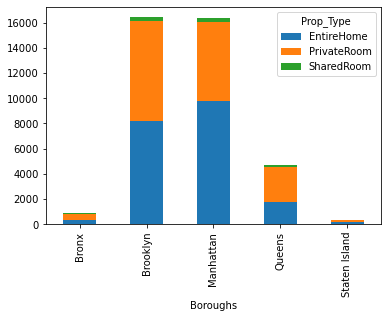

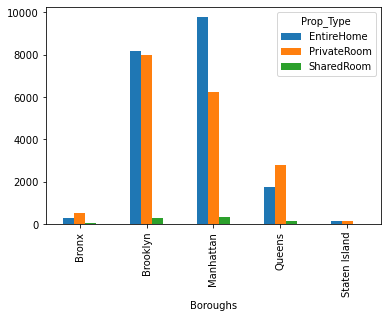

In [61]:
df = airbnb_NY.groupby(["Boroughs","Prop_Type"]).size().unstack().copy()

fig_1, ax_1 = plt.subplots()
df.plot.bar(ax = ax_1, stacked=True)

fig_2, ax_2 = plt.subplots()
df.plot.bar(ax = ax_2)

In [54]:
df

Prop_Type,EntireHome,PrivateRoom,SharedRoom
Boroughs,,,
Bronx,308,532,51
Brooklyn,8163,7992,281
Manhattan,9776,6258,349
Queens,1770,2772,153
Staten Island,156,166,6


## What about the prices?

> **Question 4A)** Which is the most expensive AirBnB?

In [28]:
#airbnb_NY.loc?
#airbnb_NY["Price"].max()?

10000.0

> **Question 4B)** How many airbnb exists that are in price less than 50 $?

> **Question 4C)** Refining B) in which borough are most of them located?

In [75]:
df = airbnb_NY.loc[airbnb_NY["Price"] < 50].copy()
display(df.groupby("Boroughs").size())
gb = df.groupby("Boroughs").size()

gb.loc[gb == gb.max()]

Boroughs
Bronx             269
Brooklyn         2110
Manhattan         550
Queens            982
Staten Island      83
dtype: int64

Boroughs
Brooklyn    2110
dtype: int64

> **Question 4D)** Take a closer look at C): provide a ranking of the mean Review-count of these airbnbs per borough!

In [78]:
df.groupby(["Boroughs"])["Review_Cnt"].mean().sort_values()

Boroughs
Brooklyn         21.005213
Manhattan        23.112727
Bronx            29.866171
Queens           34.489817
Staten Island    38.144578
Name: Review_Cnt, dtype: float64

## Statistics count!

> **Question 5A**) What is the mean cost of an airbnb in NYC?

> **Question 5B)** How does the price vary?

> **Question 5C)** How is the price changing according to the property type? which property type the less expansive one?

> **Question 5D)** how does the mean airbnb price is changing according to the boroughs?

> **Question 5E)** Which are top 10 rated airbnb per borough? calculate the mean price of them!